-> Scrapping time period:[01 June 2022 - 31 August 2022]

-> Need to add comment to Notebook for clarity




In [270]:
import tweepy
import configparser
import json
import pandas as pd
import requests
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter


In [40]:
#Reading API token and secret
config = configparser.RawConfigParser()
config.read('config.ini')

['config.ini']

In [41]:
#Getting variable from config.ini file
api_key = config['twitter']['api_key']
api_key_secret = config['twitter']['api_key_secret']
access_token = config['twitter']['access_token']
access_token_secret = config['twitter']['access_token_secret']
bearer_token = config['twitter']['bearer_secret']

In [42]:
#Getting authetication
#OAuth is an open-standard Authorization protocol or framework that provides applications the ability for "secure designated access"
#OAuth doesn't share password data but instead uses authorizations tokens to prove an identitybetween consumers and providers
#OAuth is an authorizations protocal that allows you to approve one application interacting with another on behalf without giving away your password
auth = tweepy.OAuthHandler(api_key, api_key_secret)
auth.set_access_token(access_token, access_token_secret)

#Generating an instance of Client with access full archieve from Academic Access
client = tweepy.Client(bearer_token=bearer_token)

In [227]:
dates = pd.date_range(start='06/01/2022', end='09/01/2022')
data = pd.DataFrame(columns=list(range(0,24)),index=pd.date_range(start='06/01/2022', end='09/01/2022'))

In [226]:
# To set your environment variables in your terminal run the following line:
# export 'BEARER_TOKEN'='<your_bearer_token>'

search_url = "https://api.twitter.com/2/tweets/counts/all"

# Optional params: start_time,end_time,since_id,until_id,next_token,granularity
query_params = {'query': 'bitcoin OR #bitcoin -is:retweet' ,'granularity': 'minute', 'start_time': '2022-06-01T00:00:00Z', 'end_time': '2022-06-02T00:00:00Z'}


def bearer_oauth(r):
    """
    Method required by bearer token authentication.
    """

    r.headers["Authorization"] = f"Bearer {bearer_token}"
    r.headers["User-Agent"] = "v2FullArchiveTweetCountsPython"
    return r


def connect_to_endpoint(url, params):
    response = requests.request("GET", search_url, auth=bearer_oauth, params=params)
    #print(response.status_code)
    if response.status_code != 200:
        raise Exception(response.status_code, response.text)
    return response.json()

#json_response = connect_to_endpoint(search_url, query_params)
#json_response['data']


In [225]:
#for i in range(len(data)-1):
for i in range(len(data)-1):

    search_url = "https://api.twitter.com/2/tweets/counts/all"
    start_time = '{}Z'.format(dates[i].isoformat())
    end_time = '{}Z'.format(dates[i+1].isoformat())

    query_params = {'query': 'bitcoin OR #bitcoin -is:retweet' ,'granularity': 'hour', 'start_time': start_time, 'end_time': end_time}
    json_response = connect_to_endpoint(search_url, query_params)
    #print(len(list(enumerate(json_response['data']))))
    for item in list(enumerate(json_response['data'])):
        #print(item[0],item[1]['tweet_count'])
        data[item[0]][i] = item[1]['tweet_count']
        #print(item[1]['start'])
        #print(item[1]['end'])



In [228]:
data

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
2022-06-01,6953,6648,7116,8969,8362,8390,8862,9350,8923,9563,...,13855,12934,12827,12911,13100,13438,12352,10014,8715,7265
2022-06-02,7148,8651,7636,9835,9038,8686,9204,9954,9983,10360,...,14023,13036,12218,13039,11254,10861,10367,9350,8122,7515
2022-06-03,7324,7702,7780,9134,8835,8131,9798,10709,10348,10496,...,14131,12891,14218,12432,12186,11380,9797,9332,7588,6728
2022-06-04,6923,6870,7016,8420,7599,7054,7956,8830,7857,9414,...,11033,10754,10335,9637,8148,8196,7733,6987,6472,5263
2022-06-05,5053,5299,5315,6805,7062,6553,7581,7983,8492,8291,...,14316,14775,14699,12977,13056,11559,9896,8952,7920,7520
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-28,6628,6709,6619,8434,6954,6674,7388,8617,8342,9723,...,12459,12313,11765,10978,10483,10652,9466,8852,8475,10699
2022-08-29,10921,9470,8949,9519,7775,8155,9622,11882,10656,11772,...,16595,14739,13186,11628,13418,11971,10050,9216,8069,7003
2022-08-30,6692,6376,7405,9066,8743,7592,8730,9594,8741,10143,...,14469,13724,13785,13446,11883,11576,10473,8436,7763,7528
2022-08-31,7944,7912,8795,9957,7507,7430,8425,10450,10453,12578,...,14344,12750,12274,11649,12458,10725,9592,9044,8346,7028


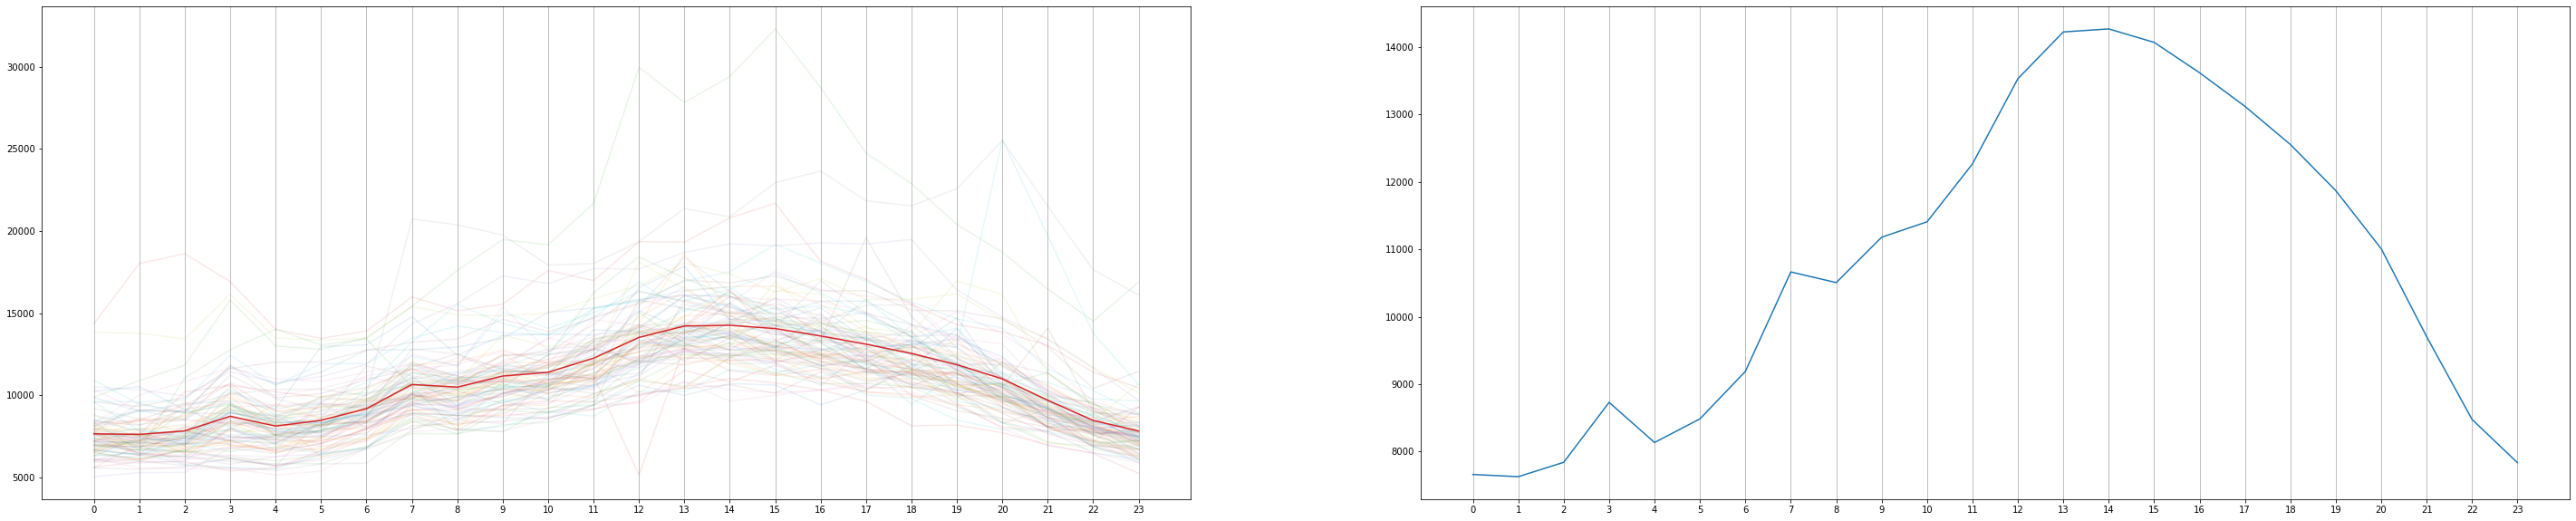

In [229]:
fig, axs = plt.subplots(1,2)

axs[0].plot(data.T,alpha = 0.1)
axs[0].plot(data.mean().T)
axs[0].grid(axis='x')
axs[0].set_xticks(np.arange(0,24))
axs[1].plot(data.mean().T)
axs[1].grid(axis='x')
axs[1].set_xticks(np.arange(0,24))
plt.rcParams['figure.figsize'] = [50, 10]


<BarContainer object of 24 artists>

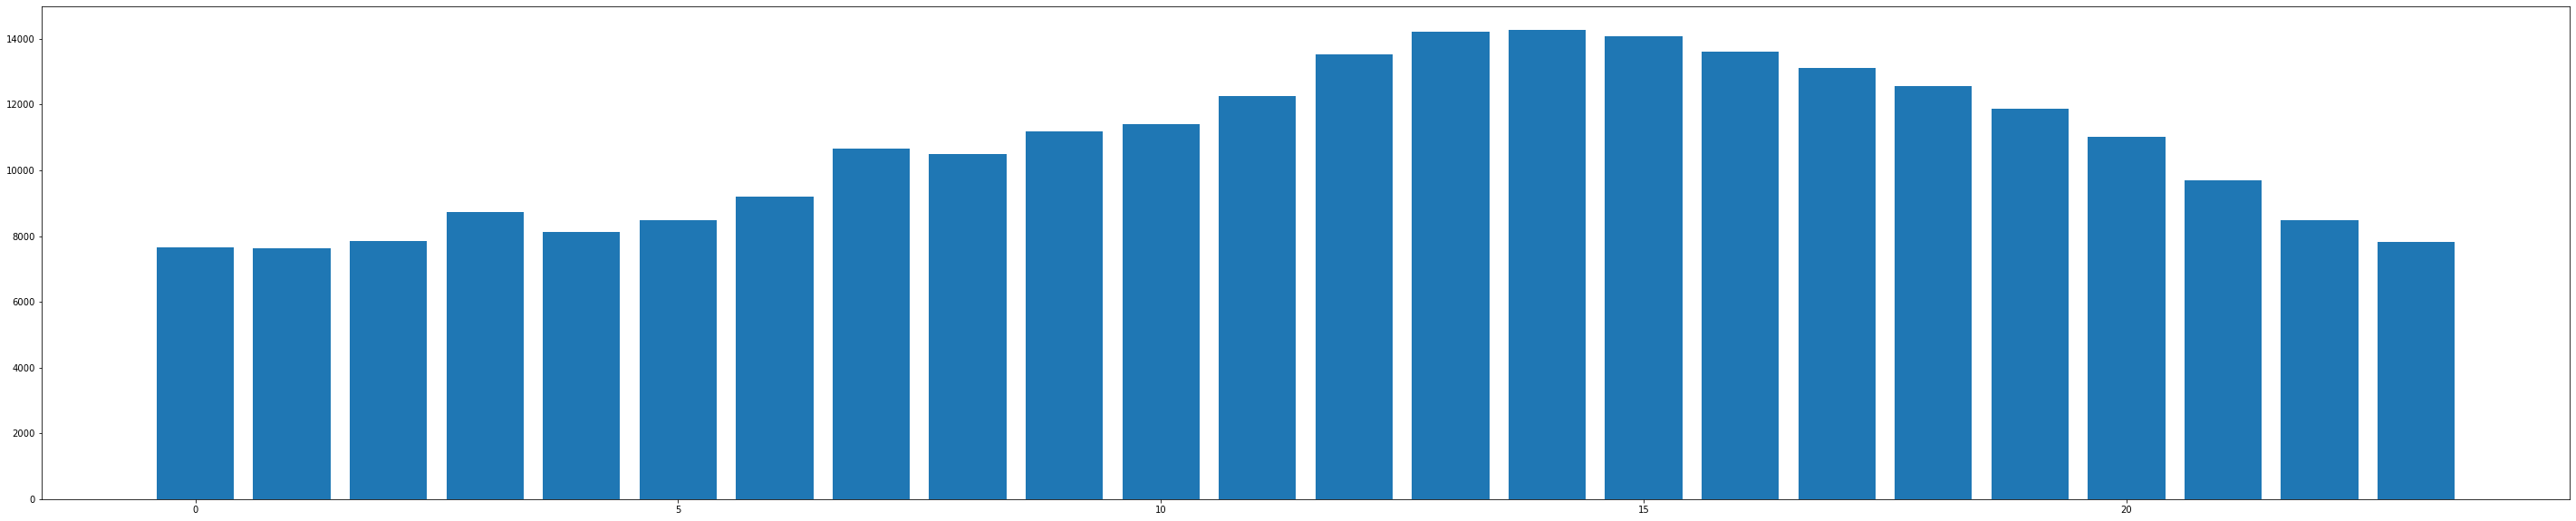

In [230]:
plt.bar(x=data.columns,height=data.mean().values)

In [194]:
data_min = pd.DataFrame(columns=list(range(0,1440)),index=pd.date_range(start='06/01/2022', end='09/01/2022'))

In [195]:
#for i in range(len(data_min)-1):
for i in range(len(data_min)-1):

    search_url = "https://api.twitter.com/2/tweets/counts/all"
    start_time = '{}Z'.format(dates[i].isoformat())
    end_time = '{}Z'.format(dates[i+1].isoformat())

    query_params = {'query': 'bitcoin OR #bitcoin -is:retweet' ,'granularity': 'minute', 'start_time': start_time, 'end_time': end_time}
    json_response = connect_to_endpoint(search_url, query_params)
    #print(len(list(enumerate(json_response['data']))))
    for item in list(enumerate(json_response['data'])):
        #print(item[0],item[1]['tweet_count'])
        data_min[item[0]][i] = item[1]['tweet_count']
        #print(item[1]['start'])
        #print(item[1]['end'])


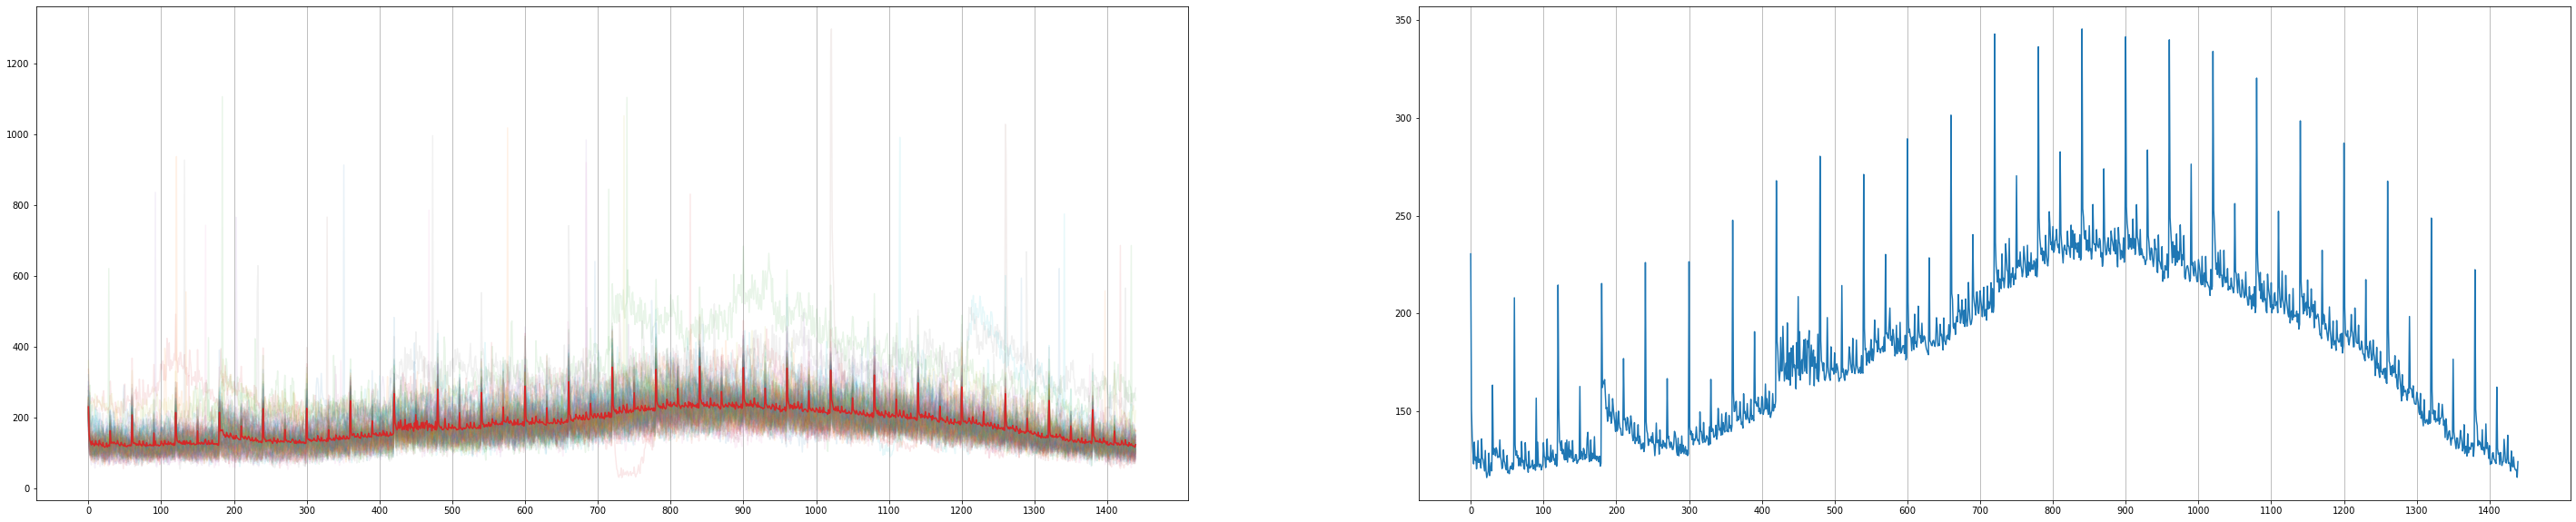

In [197]:
fig, axs = plt.subplots(1,2)

axs[0].plot(data_min.T,alpha = 0.1)
axs[0].plot(data_min.mean().T)
axs[0].grid(axis='x')
axs[0].set_xticks(np.arange(0,1440,100))
axs[1].plot(data_min.mean().T)
axs[1].grid(axis='x')
axs[1].set_xticks(np.arange(0,1440,100))
plt.rcParams['figure.figsize'] = [50, 10]

<BarContainer object of 1440 artists>

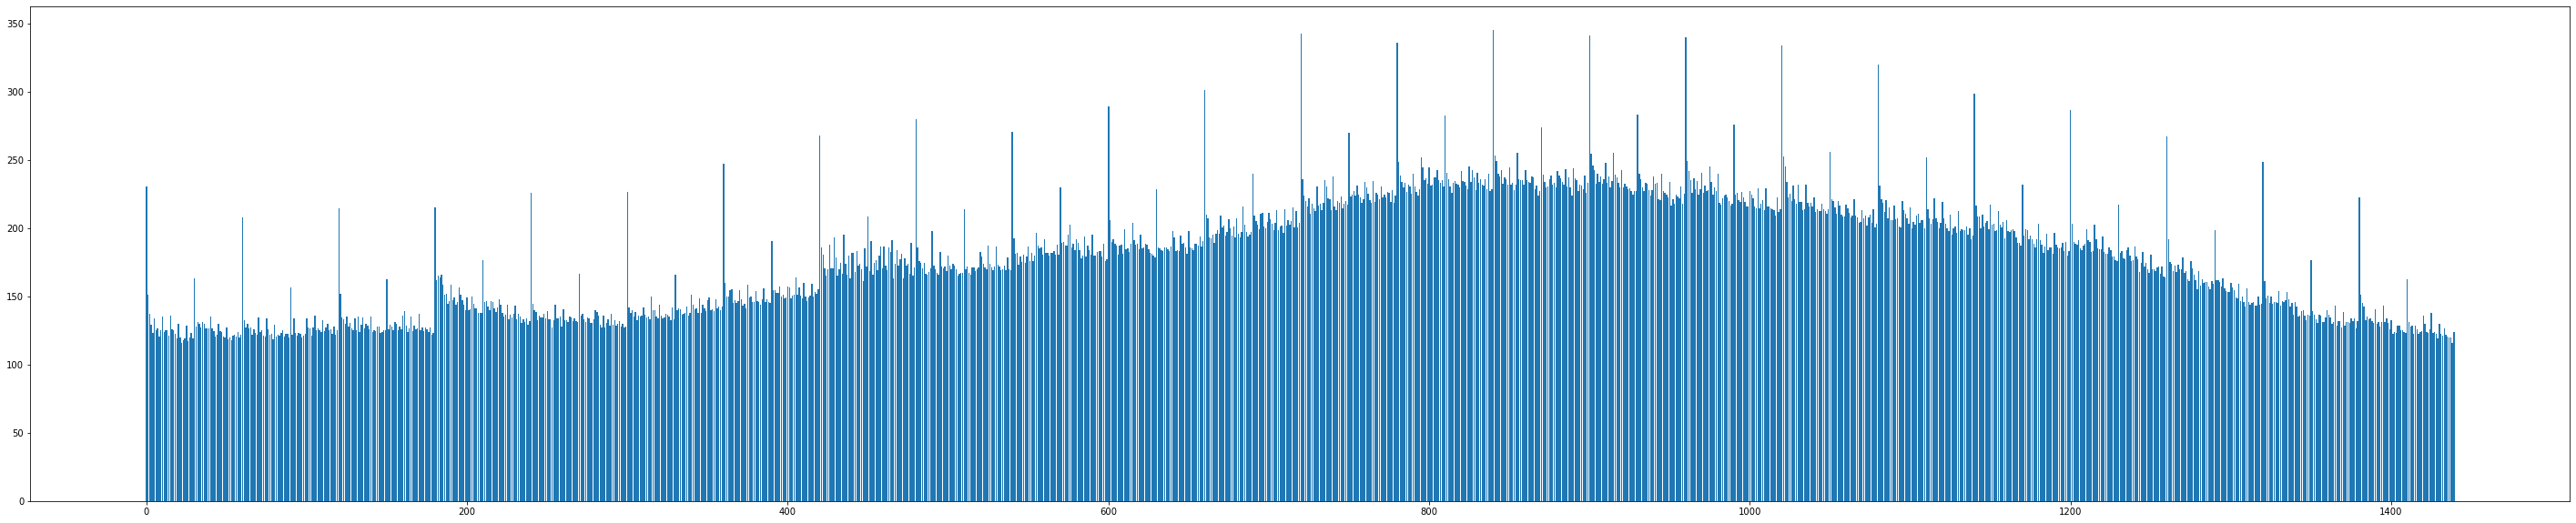

In [198]:
plt.bar(x=data_min.columns,height=data_min.mean().values)

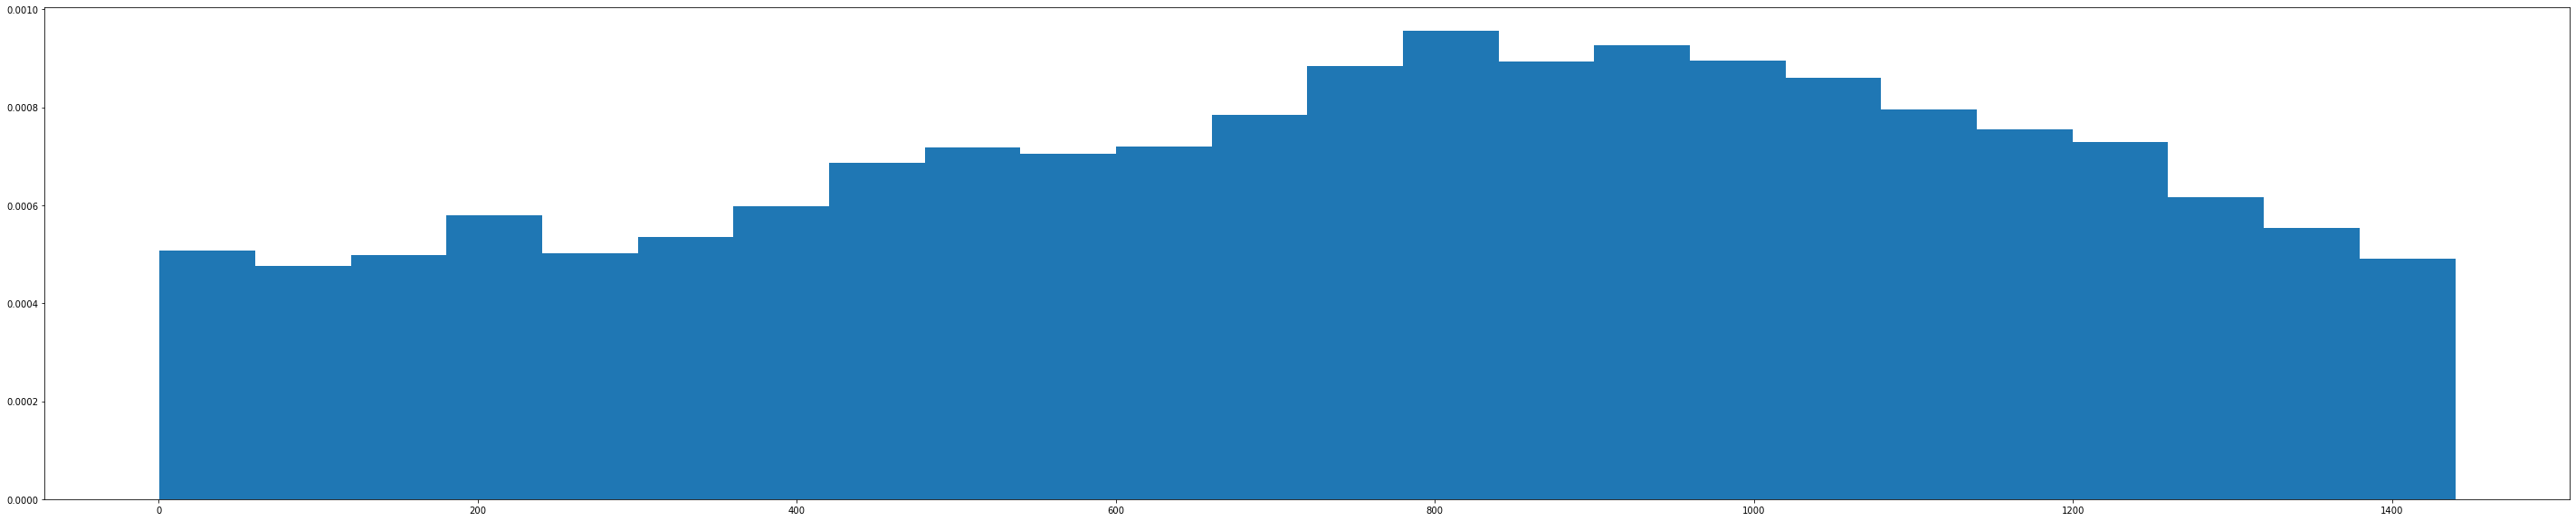

In [404]:
p = data_min.sum(axis=0)/(sum(data_min.sum(axis=0)))
Y = np.arange(0,1440,1)
n = 21600

def drv (p,Y,n):
    F = p.cumsum()
    X = np.zeros(n)
    U = np.random.random(n)
    for i in range(n):
        #print(Y[U[i] <= F])
        X[i] = Y[U[i] <= F][0]
    return X

X = drv(p,Y,n)

H = plt.hist(X, bins=24,density= True,range =(0.5,1439.5))
#H = plt.yticks(np.arange(0,0.4,0.02))
#H = plt.grid('Y')

In [405]:
X

array([ 410.,   30.,  689., ...,  933., 1226.,  843.])

In [406]:
my_dict = {i:list(X).count(i) for i in X}


In [416]:
np.min(list(my_dict.values()))

3

In [403]:
my_dict

{562.0: 4,
 1066.0: 3,
 767.0: 4,
 871.0: 3,
 800.0: 3,
 569.0: 4,
 194.0: 3,
 1353.0: 7,
 182.0: 8,
 468.0: 6,
 491.0: 3,
 589.0: 1,
 1070.0: 5,
 777.0: 8,
 588.0: 5,
 548.0: 14,
 907.0: 5,
 1283.0: 6,
 18.0: 3,
 864.0: 9,
 192.0: 2,
 976.0: 4,
 794.0: 6,
 591.0: 6,
 1186.0: 7,
 1110.0: 4,
 779.0: 3,
 397.0: 5,
 687.0: 3,
 1132.0: 3,
 104.0: 4,
 1024.0: 6,
 1237.0: 7,
 544.0: 3,
 406.0: 4,
 372.0: 3,
 989.0: 4,
 93.0: 5,
 1254.0: 2,
 1261.0: 2,
 1340.0: 3,
 1072.0: 6,
 238.0: 2,
 828.0: 4,
 450.0: 2,
 1194.0: 3,
 728.0: 7,
 33.0: 3,
 748.0: 6,
 1305.0: 2,
 1055.0: 5,
 893.0: 10,
 931.0: 7,
 751.0: 6,
 1054.0: 4,
 1325.0: 5,
 168.0: 3,
 67.0: 2,
 613.0: 3,
 1086.0: 8,
 533.0: 7,
 954.0: 7,
 64.0: 3,
 1127.0: 4,
 926.0: 2,
 754.0: 5,
 867.0: 7,
 316.0: 4,
 1120.0: 4,
 918.0: 5,
 901.0: 8,
 1434.0: 2,
 246.0: 2,
 60.0: 5,
 276.0: 4,
 1142.0: 6,
 237.0: 4,
 820.0: 3,
 711.0: 2,
 554.0: 2,
 740.0: 6,
 686.0: 4,
 1381.0: 1,
 1253.0: 5,
 442.0: 4,
 1428.0: 6,
 1050.0: 7,
 157.0: 3,
 584.0: 6

In [363]:
count = pd.DataFrame(columns=['Count'],index=range(1440))
count

,Count
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
1435,NaN
1436,NaN
1437,NaN
1438,NaN


In [370]:
from datetime import datetime


for i in range(1440):
    count['Count'][i]= my_dict[i]

count.to_csv('count_{}.csv'.format(datetime.datetime.now()),index=False)



In [388]:
for item in range(5,10):
    print(item)

5
6
7
8
9


In [386]:
count[0:24].sum()

Count    917
dtype: object

<BarContainer object of 24 artists>

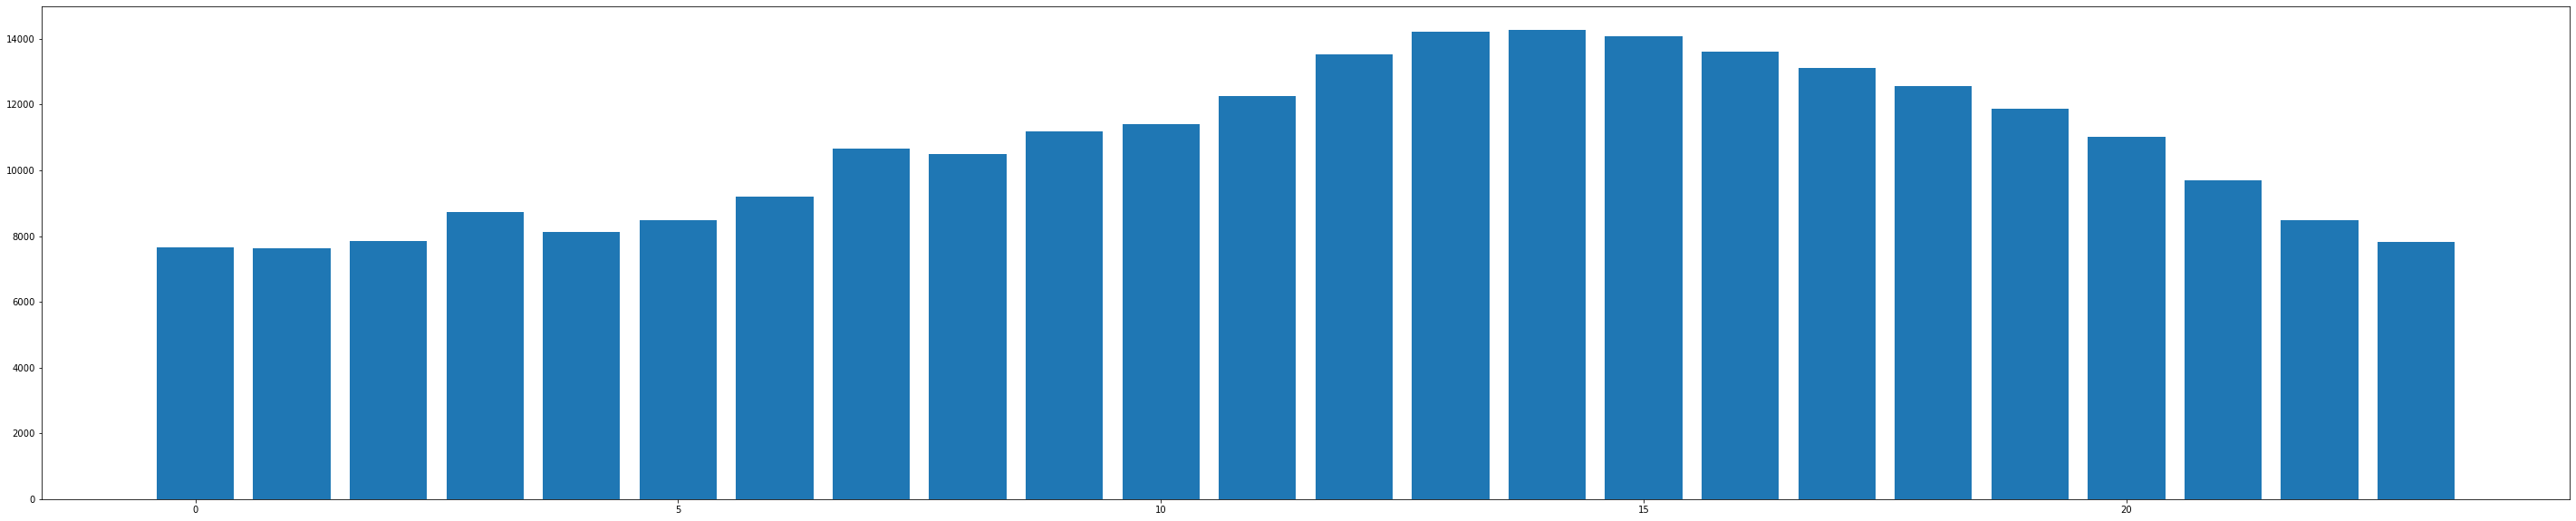

In [341]:
plt.bar(x=data.columns,height=data.mean().values)

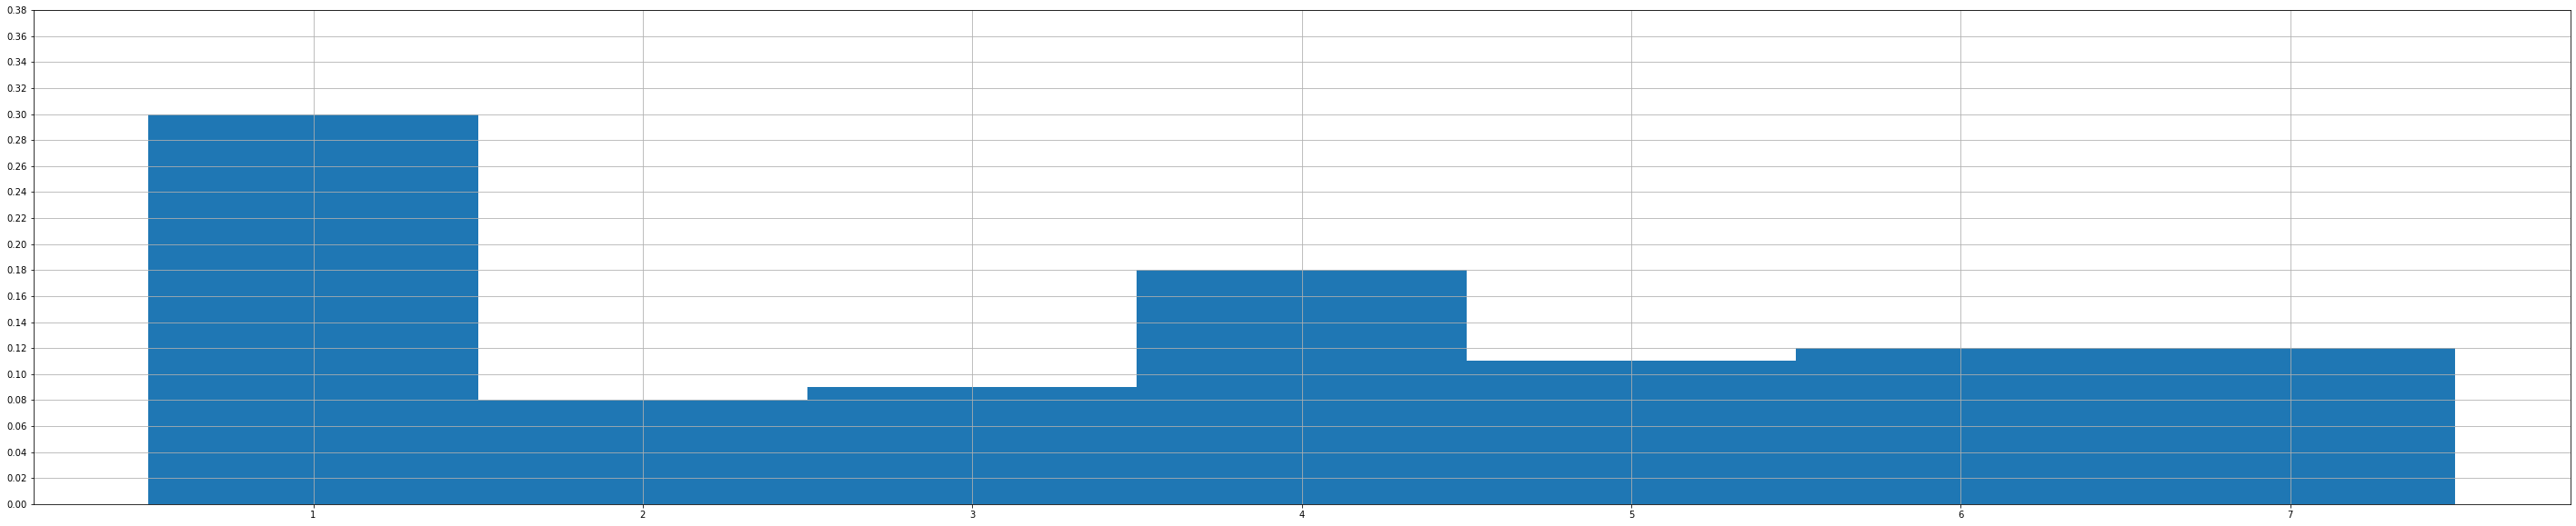

In [222]:
p = np.array([0.3,0.12,0.09,0.12,0.1,0.17,0.1]) #Set this probability distribution as the proportion of tweets per hour
Y = np.arange(1,8,1) #set this as all the minutes that can be drawn 1440
n = 100 #Sample number I want
def drv (p,Y,n):
    F = p.cumsum()
    X = np.zeros(n)
    U = np.random.random(n)
    for i in range(n):
        X[i] = Y[U[i] <= F][0]
    return X

X = drv(p,Y,n)

H = plt.hist(X, bins=7,density= True,range =(0.5,7.5))
H = plt.yticks(np.arange(0,0.4,0.02))
H = plt.grid('Y')